## Survival Analysis

Survival analysis is a branch of statistics that deals with the analysis of time-to-event data. This tutorial covers key concepts, mathematical background, and numerical examples for the major topics in survival analysis.

### 1. Kaplan-Meier Estimator

The Kaplan-Meier estimator is used to estimate the survival function from lifetime data. It is a non-parametric statistic.

*Example:*

Suppose we have data on the survival times of patients in a clinical trial:

| Patient | Time (months) | Event |
|---------|---------------|-------|
| A       | 5             | 1     |
| B       | 8             | 1     |
| C       | 12            | 0     |
| D       | 14            | 1     |
| E       | 18            | 0     |

Where:
- `Time` is the time until the event or censoring.
- `Event` is 1 if the event occurred (e.g., death), 0 if censored.

1. **Calculate Survival Probability at Each Event Time**:

For each time $t_i$ where an event occurs, the Kaplan-Meier estimator is given by:

$$ \hat{S}(t_i) = \hat{S}(t_{i-1}) \left(1 - \frac{d_i}{n_i}\right) $$

Where:
- $d_i$ = number of events at time $t_i$
- $n_i$ = number of individuals at risk just before time $t_i$

Let's calculate it step-by-step:

- At $t = 5$ months:
  - $d_1 = 1$
  - $n_1 = 5$
  - $\hat{S}(5) = \left(1 - \frac{1}{5}\right) = 0.8$

- At $t = 8$ months:
  - $d_2 = 1$
  - $n_2 = 4$
  - $\hat{S}(8) = 0.8 \left(1 - \frac{1}{4}\right) = 0.8 \times 0.75 = 0.6$

- At $t = 12$ months:
  - Censored, no event.

- At $t = 14$ months:
  - $d_3 = 1$
  - $n_3 = 3$
  - $\hat{S}(14) = 0.6 \left(1 - \frac{1}{3}\right) = 0.6 \times \frac{2}{3} = 0.4$

2. **Construct Survival Curve**: Plot $\hat{S}(t)$ against time $t$.

**Key Properties:**

1. **Step Function**: The survival function is a step function that decreases at each event time.
2. **Censoring**: The Kaplan-Meier estimator handles right-censored data.
3. **Non-Parametric**: No assumption about the underlying survival distribution.

### 2. Cox Proportional Hazards Model

The Cox Proportional Hazards Model is used to investigate the effect of several variables on survival time.

*Example:*

Suppose we have data on patients' survival times along with an explanatory variable, treatment (0 for control, 1 for treatment):

| Patient | Time (months) | Event | Treatment |
|---------|---------------|-------|-----------|
| A       | 5             | 1     | 0         |
| B       | 8             | 1     | 1         |
| C       | 12            | 0     | 0         |
| D       | 14            | 1     | 1         |
| E       | 18            | 0     | 1         |

1. **Cox Model Equation**: The hazard function for the Cox model is:

$$ h(t|X) = h_0(t) \exp(\beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p) $$

Where:
- $h(t|X)$ = hazard function at time $t$ for covariate vector $X$
- $h_0(t)$ = baseline hazard function
- $\beta_1, \beta_2, \ldots, \beta_p$ = coefficients for covariates

2. **Estimate Coefficients**: Use partial likelihood to estimate $\beta$ coefficients.

**Key Properties:**

1. **Proportional Hazards Assumption**: Assumes the hazard ratios are constant over time.
2. **Baseline Hazard**: The model does not specify the baseline hazard function, making it semi-parametric.
3. **Interpretation**: $\exp(\beta_i)$ represents the hazard ratio for a one-unit increase in the $i$th covariate.

### 3. Log-Rank Test

The Log-Rank Test is used to compare the survival distributions of two or more groups.

*Example:*

Suppose we want to compare the survival times of patients in two different treatment groups (0 for control, 1 for treatment).

| Time (months) | Control Group (Events/At Risk) | Treatment Group (Events/At Risk) |
|---------------|--------------------------------|----------------------------------|
| 5             | 1/2                            | 0/3                              |
| 8             | 0/1                            | 1/3                              |
| 12            | 0/1                            | 0/2                              |
| 14            | 0/1                            | 1/2                              |
| 18            | 0/1                            | 0/1                              |

1. **Calculate Expected Events**: For each time $t_i$, calculate the expected number of events for each group.

2. **Calculate Test Statistic**:

$$ \chi^2 = \frac{(O_E - E_E)^2}{E_E} + \frac{(O_C - E_C)^2}{E_C} $$

Where:
- $O_E$ = observed events in experimental group
- $E_E$ = expected events in experimental group
- $O_C$ = observed events in control group
- $E_C$ = expected events in control group

**Key Properties:**

1. **Non-Parametric**: Does not assume any specific survival distribution.
2. **Comparative**: Used to compare survival curves between groups.
3. **Test of Homogeneity**: Tests if survival distributions are the same across groups.

### 4. Nelson-Aalen Estimator

The Nelson-Aalen Estimator is used to estimate the cumulative hazard function.

*Example:*

Using the same dataset as the Kaplan-Meier example:

| Patient | Time (months) | Event |
|---------|---------------|-------|
| A       | 5             | 1     |
| B       | 8             | 1     |
| C       | 12            | 0     |
| D       | 14            | 1     |
| E       | 18            | 0     |

1. **Calculate Cumulative Hazard**: At each event time $t_i$,

$$ \hat{H}(t_i) = \sum_{t_j \leq t_i} \frac{d_j}{n_j} $$

Where:
- $d_j$ = number of events at time $t_j$
- $n_j$ = number of individuals at risk just before time $t_j$

2. **Step-by-Step Calculation**:

- At $t = 5$ months:
  - $H(5) = \frac{1}{5} = 0.2$

- At $t = 8$ months:
  - $H(8) = H(5) + \frac{1}{4} = 0.2 + 0.25 = 0.45$

- At $t = 14$ months:
  - $H(14) = H(8) + \frac{1}{3} = 0.45 + 0.333 = 0.783$

**Key Properties:**

1. **Cumulative Hazard**: Estimates the cumulative hazard function over time.
2. **Non-Parametric**: Does not assume any specific survival distribution.
3. **Relation to KM Estimator**: The Kaplan-Meier estimator can be transformed into the Nelson-Aalen estimator.

### 5. Parametric Survival Models

Parametric survival models assume a specific distribution for survival times (e.g., Exponential, Weibull).

#### Exponential Model

*Example:*

Suppose we assume the survival times follow an exponential distribution with rate parameter $\lambda$.

1. **Exponential Distribution**: The survival function is:

$$ S(t) = \exp(-\lambda t) $$

2. **Estimate $\lambda$**: Using the observed survival times.

For the dataset:

| Time (months) | Event |
|---------------|-------|
| 5             | 1     |
| 8             | 1     |
| 12            | 0     |
| 14            | 1     |
| 18            | 0     |

$$ \hat{\lambda} = \frac{\text{Number of Events}}{\text{Total Time at Risk}} $$

Total time at risk for events is $5 + 8 + 14 = 27$ months.

Number of events = 3.

$$ \hat{\lambda} = \frac{3}{27} = 0.111 $$

#### Weibull Model

*Example:*

Suppose we assume the survival times follow a Weibull distribution with shape parameter $k$ and scale parameter $\lambda$.

1. **Weibull Distribution**: The survival function is:

$$ S(t) = \exp(-(\lambda t)^k) $$

2. **Estimate Parameters**: Using the observed survival times and maximum likelihood estimation.

**Key Properties:**

1. **Distribution-Based**: Assumes a specific distribution for survival times.
2. **Flexibility**: Different distributions can model different types of survival data.
3. **Parameter Estimation**: Involves estimating distribution parameters from data.

### Summary

Survival analysis provides powerful tools for analyzing time-to-event data. The Kaplan-Meier estimator, Cox Proportional Hazards Model, Log-Rank Test, Nelson-Aalen Estimator, and Parametric Survival Models offer robust methods for various data analysis scenarios. Mastery of these concepts enables effective analysis of survival data, accommodating right-censored data and exploring the effects of covariates.


In [ ]:
!pip install lifelines

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

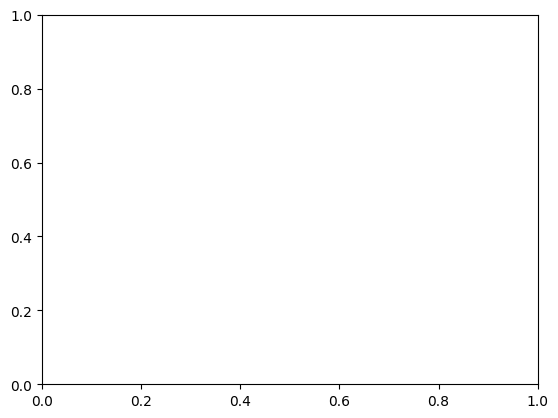

In [ ]:
## Survival Analysis with Python

import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter


# Sample data for Kaplan-Meier Estimator
data_km = {
    'time': [5, 8, 12, 14, 18],
    'event': [1, 1, 0, 1, 0]
}

df_km = pd.DataFrame(data_km)

# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()
kmf.fit(df_km['time'], event_observed=df_km['event'])

# Plot the survival function
kmf.plot_survival_function()
# plt.title('Kaplan-Meier Survival Function')
# plt.xlabel('Time (months)')
# plt.ylabel('Survival Probability')
# plt.show()


In [ ]:
# Cox Proportional Hazards Model
from lifelines import CoxPHFitter

# Sample data for Cox Proportional Hazards Model
data_cox = {
    'time': [5, 8, 12, 14, 18],
    'event': [1, 1, 0, 1, 0],
    'treatment': [0, 1, 0, 1, 1]
}

df_cox = pd.DataFrame(data_cox)

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='time', event_col='event')

# Print summary
cph.print_summary()

# Plot the survival function
cph.plot()
plt.title('Cox Proportional Hazards Model')
plt.show()


In [ ]:
# Log-Rank Test
